# Building A simple Machine Learning pipeline using scikit-learn!

In [1]:
# importing required values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
# read the train data
train_data = pd.read_csv('train.csv')

train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# check for the null values
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64
---------------------------
0    12.15
dtype: float64
---------------------------
12.6
---------------------------


<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

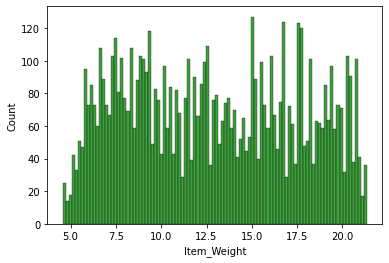

In [6]:
temp = "Item_Weight"

print(train_data[temp].describe())
print("---------------------------")
print(train_data[temp].mode())
print("---------------------------")
print(train_data[temp].median())
print("---------------------------")
#train_data[temp].hist()

sns.histplot(train_data[temp], bins= 100, color= "green")

There are only two variables with missing values – <b><i>Item_Weight</i></b> and <b><i>Outlet_Size</i></b>.

Since Item_Weight is a continuous variable, we can use either mean or median to impute the missing values. On the other hand, Outlet_Size is a categorical variable and hence we will replace the missing values by the mode of the column. You can try different methods to impute missing values as well.

In [7]:
# impute missing values in item weight by mean
train_data.Item_Weight.fillna(train_data.Item_Weight.mean(),inplace=True)

# impute missing values in item weight by mean
#train_data["Item_Weight"].replace(np.nan, train_data["Item_Weight"].mean(), inplace= True)

# impute outlet size in training data by mode
train_data.Outlet_Size.fillna(train_data.Outlet_Size.mode()[0],inplace=True)

Additionally, machine learning models cannot work with categorical (string) data as well, specifically scikit-learn. Before building a machine learning model, we need to convert the categorical variables into numeric types. Let us do that.

In [8]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

<b>Note:</b> In this example I am not going to encode Item_Identifier since it will increase the number of feature to 1500. This feature  can be used in other ways (read here), but to keep the model simple, I will not use this feature here.

In [9]:
import category_encoders as ce

In [10]:
# create an object of the OneHotEncoder
OHE = ce.OneHotEncoder(cols=['Item_Fat_Content',
                             'Item_Type',
                             'Outlet_Identifier',
                             'Outlet_Size',
                             'Outlet_Location_Type',
                             'Outlet_Type'],use_cat_names=True)
# encode the categorical variables
train_data = OHE.fit_transform(train_data)

/Users/anshulchaurasia/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Identify the whether we should take mean or median to replace null values in Item_Weight

In [11]:
train_data.isnull().sum()

Item_Identifier                    0
Item_Weight                        0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Fat_Content_low fat           0
Item_Fat_Content_LF                0
Item_Fat_Content_reg               0
Item_Visibility                    0
Item_Type_Dairy                    0
Item_Type_Soft Drinks              0
Item_Type_Meat                     0
Item_Type_Fruits and Vegetables    0
Item_Type_Household                0
Item_Type_Baking Goods             0
Item_Type_Snack Foods              0
Item_Type_Frozen Foods             0
Item_Type_Breakfast                0
Item_Type_Health and Hygiene       0
Item_Type_Hard Drinks              0
Item_Type_Canned                   0
Item_Type_Breads                   0
Item_Type_Starchy Foods            0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_MRP                           0
Outlet_Identifier_OUT049           0
Outlet_Identifier_OUT018           0
O

### Scale the data:
So far we have taken care of the missing values and the categorical (string) variables in the data. Next we will work with the continuous variables. Often the continuous variables in the data have different scales, for instance, a variable V1 can have a range from 0 to 1 while another variable can have a range from 0-1000.

Based on the type of model you are building, you will have to normalize the data in such a way that the range of all the variables is almost similar. You can do this easily in python using the StandardScaler function.

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
# create an object of the StandardScaler
scaler = StandardScaler()

# fit with the Item_MRP
scaler.fit(np.array(train_data.Item_MRP).reshape(-1,1))

# transform the data
train_data.Item_MRP = scaler.transform(np.array(train_data.Item_MRP).reshape(-1,1))

### Model Building
Now that we are done with the basic pre-processing steps, we can go ahead and build simple machine learning models over this data. We will try two models here – Linear Regression and Random Forest Regressor to predict the sales.

To compare the performance of the models, we will create a validation set (or test set). Here I have randomly split the data into two parts using the train_test_split() function, such that the validation set holds 25% of the data points while the train set has 75%

In [14]:
# importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [15]:
# separate the independent and target variable 
train_X = train_data.drop(columns=['Item_Identifier','Item_Outlet_Sales'])
train_Y = train_data['Item_Outlet_Sales']

# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y,test_size=0.25,random_state=0)

# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((6392, 45), (2131, 45), (6392,), (2131,))

Great, we have our train and validation sets ready. Let us train a linear regression model on this data and check it’s performance on the validation set.

In [16]:
# create an object of the LinearRegression Model
model_LR = LinearRegression()

# fit the model with the training data
model_LR.fit(train_x,train_y)

# predict the target on train and test data 
predict_train = model_LR.predict(train_x)
predict_test  = model_LR.predict(test_x)

# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))


RMSE on train data:  1120.4274897939736
RMSE on test data:  1148.8031954261644


The linear regression model has a very high RMSE value on both training and validation data. Let us see if a tree-based model performs better in this case. Here we will train a random forest and check if we get any improvement in the train and validation errors.

In [17]:
# create an object of the RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=10)

# fit the model with the training data
model_RFR.fit(train_x, train_y)

# predict the target on train and test data
predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)

# Root Mean Squared Error on train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))

RMSE on train data:  896.2391709786904
RMSE on test data:  1117.3355725298723


As you can see, there is a significant improvement on is the RMSE values. You can train more complex machine learning models like Gradient Boosting and XGBoost, and see of the RMSE value further improves.

A very interesting feature of the random forest algorithm is that it gives you the ‘feature importance’ for all the variables in the data. Let us see how can we use this attribute to make our model simpler and better!

### Feature Importance
After the preprocessing and encoding steps, we had a total of 45 features and not all of these may be useful in forecasting the sales. Alternatively we can select the top 5 or top 7 features, which had a major contribution in forecasting sales values.

If the model performance is similar in both the cases, that is – by using 45 features and by using 5-7 features, then we should use only the top 7 features, in order to keep the model more simple and efficient.

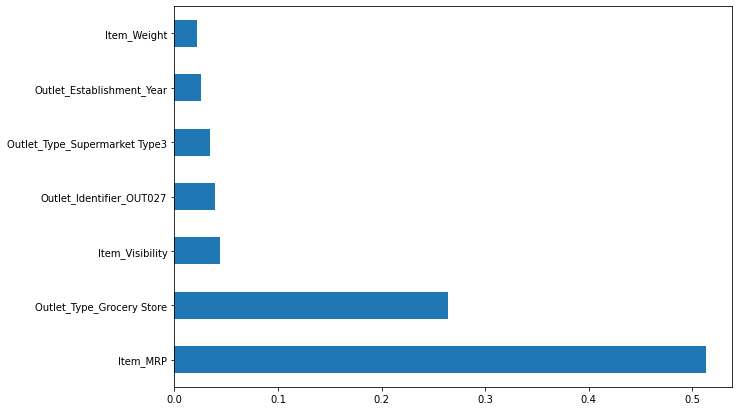

In [18]:
# plot the 7 most important features
plt.figure(figsize=(10,7))
feat_importances = pd.Series(model_RFR.feature_importances_, index = train_x.columns)
feat_importances.nlargest(7).plot(kind='barh');

<b>Now:</b><br>we are going to train the same random forest model using these 7 features only and observe the change in RMSE values for the train and the validation set.</br>

In [19]:
# training data with 7 most important features
train_x_if = train_x[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]
# test data with 7 most important features
test_x_if = test_x[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]

# create an object of the RandfomForestRegressor Model
model_RFR_with_if = RandomForestRegressor(max_depth=10,random_state=2)

# fit the model with the training data
model_RFR_with_if.fit(train_x_if, train_y)

# predict the target on the training and test data
predict_train_with_if = model_RFR_with_if.predict(train_x_if)
predict_test_with_if = model_RFR_with_if.predict(test_x_if)

# Root Mean Squared Error on the train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train_with_if)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test_with_if)**(0.5))

RMSE on train data:  899.9916554012883
RMSE on test data:  1117.6036288757123


<b>Now,</b>This is amazing! Using only 7 features has given almost the same performance as the previous model where we were using 45 features. Let us identify the final set of features that we need and the preprocessing steps for each of them.

<b>Building Pipeline</b>
First of all, we will read the data set and separate the independent and target variable from the training dataset.

In [20]:
# importing required libraries
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# read the training data set
data = pd.read_csv('train.csv')

# top rows of the data
data.head()

# seperate the independent and target variables
train_x = data.drop(columns=['Item_Outlet_Sales'])
train_y = data['Item_Outlet_Sales']

### Pipeline Design
Now we built a prototype to understand the preprocessing requirement for our data.

1. Create the required binary features
We will create a custom transformer that will add 3 new binary columns to the existing data.

Outlet_Type : Grocery Store
Outlet_Type : Supermarket Type3
Outlet_Identifier_OUT027

2. Data Preprocessing and transformations.
We will use a ColumnTransformer to do the required transformations. It will contain 3 steps.

Drop the columns that are not required for model training
Impute missing values in the column Item_Weight using the average
Scale the column Item_MRP using  StandardScaler()

3. Use the model to predict the target on the cleaned data
This will be the final step in the pipeline. In the last two steps we preprocessed the data and made it ready for the model building process. Finally, we will use this data and build a machine learning model to predict the Item Outlet Sales.

### Building Pipeline

In [21]:
# importing required libraries
import pandas as pd
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

import category_encoders as ce

In [22]:
# read the training data set
data = pd.read_csv('train.csv')

# top rows of the data
data.head()

# seperate the independent and target variables
train_x = data.drop(columns=['Item_Outlet_Sales'])
train_y = data['Item_Outlet_Sales']

<b>Now,</b> as a first step, we need to create 3 new binary columns using a custom transformer. Here are the steps we need to follow to create a custom transformer.
1. Define a class OutletTypeEncoder
2. Add the parameter BaseEstimator while defining the class
3. The class must contain fit and transform methods

In [23]:
# import the BaseEstimator
from sklearn.base import BaseEstimator

# define the class OutletTypeEncoder
# This will be our custom transformer that will create 3 new binary columns
# custom transformer must have methods fit and transform
class OutletTypeEncoder(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, documents, y=None):
        return self

    def transform(self, x_dataset):
        x_dataset['outlet_grocery_store'] = (x_dataset['Outlet_Type'] == 'Grocery Store')*1
        x_dataset['outlet_supermarket_3'] = (x_dataset['Outlet_Type'] == 'Supermarket Type3')*1
        x_dataset['outlet_identifier_OUT027'] = (x_dataset['Outlet_Identifier'] == 'OUT027')*1
        
        return x_dataset
        

Next we will define the pre-processing steps required before the model building process.

1. Drop the columns – Item_Identifier, Outlet_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type and Outlet_Establishment_Year
2. Impute missing values in column Item_Weight with mean
3. Scale the column Item_MRP using StandardScaler().

In [24]:
# pre-processsing step
# Drop the columns - 
# Impute the missing values in column Item_Weight by mean
# Scale the data in the column Item_MRP
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[('drop_columns', 'drop', ['Item_Identifier',
                                                                        'Outlet_Identifier',
                                                                        'Item_Fat_Content',
                                                                        'Item_Type',
                                                                        'Outlet_Identifier',
                                                                        'Outlet_Size',
                                                                        'Outlet_Location_Type',
                                                                        'Outlet_Type'
                                                                       ]),
                                              ('impute_item_weight', SimpleImputer(strategy='mean'), ['Item_Weight']),
                                              ('scale_data', StandardScaler(),['Item_MRP'])])

### Predict the target
This will be the final block of the machine learning pipeline – define the steps in order for the pipeline object! As you can see in the code below we have specified three steps – create binary columns, preprocess the data, train a model.

When we use the fit() function with a pipeline object, all three steps are executed. Post the model training process, we use the predict() function that uses the trained model to generate the predictions.

In [25]:
# Define the Pipeline
"""
Step1: get the oultet binary columns
Step2: pre processing
Step3: Train a Random Forest Model
"""
model_pipeline = Pipeline(steps=[('get_outlet_binary_columns', OutletTypeEncoder()), 
                                 ('pre_processing',pre_process),
                                 ('random_forest', RandomForestRegressor(max_depth=10,random_state=2))
                                 ])
# fit the pipeline with the training data
model_pipeline.fit(train_x,train_y)

# predict target values on the training data
model_pipeline.predict(train_x)

array([4348.01437159,  693.40276088, 2323.35268531, ..., 1300.83665376,
       1508.86795688, 1152.35475793])

Now, we will read the test data set and we call predict function only on the pipeline object to make predictions on the test data.

In [26]:
# read the test data
test_data = pd.read_csv('test.csv')

# predict target variables on the test data 
model_pipeline.predict(test_data)

array([1646.0548363 , 1305.4298012 ,  649.26184297, ..., 1848.60226305,
       3959.67937864, 1384.01466986])

# #######

In [29]:
train_x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,outlet_grocery_store,outlet_supermarket_3,outlet_identifier_OUT027
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,0,0,0
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,0,0,0
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,0,0,0
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,1,0,0
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,0,0,0
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,0,0,0
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,0,0,0
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,0,0,0


In [31]:
train_x_if.head()

,Item_MRP,Outlet_Type_Grocery Store,Item_Visibility,Outlet_Type_Supermarket Type3,Outlet_Identifier_OUT027,Outlet_Establishment_Year,Item_Weight
3865,0.526380,1,0.101542,0,0,1998,10.695
6191,1.084514,0,0.099024,0,0,2009,8.880
5584,0.335531,0,0.041837,0,0,1999,5.260
5388,1.334696,0,0.000000,0,0,2009,18.250
1484,0.820977,0,0.032581,0,0,2004,16.750
